In [1]:
import numpy as np
import matplotlib.pyplot as plt
import patsy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df_movie=pd.read_csv('movie.csv',sep=';')
df_cost=pd.read_csv('cost.csv', sep=';')

In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    6442 non-null   object
 1   Release_year  6442 non-null   int64 
 2   Minutes       6442 non-null   int64 
 3   Movie_Rating  6442 non-null   int64 
 4   Votes         6442 non-null   int64 
 5   MetaScore     6442 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 302.1+ KB


In [4]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       475 non-null    object
 1   Production_cost  475 non-null    int64 
 2   Domestic_gross   475 non-null    int64 
 3   Worldwide_gross  475 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.0+ KB


In [5]:
df=pd.merge(df_movie,df_cost,on='Movie Name')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       459 non-null    object
 1   Release_year     459 non-null    int64 
 2   Minutes          459 non-null    int64 
 3   Movie_Rating     459 non-null    int64 
 4   Votes            459 non-null    int64 
 5   MetaScore        459 non-null    int64 
 6   Production_cost  459 non-null    int64 
 7   Domestic_gross   459 non-null    int64 
 8   Worldwide_gross  459 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 32.4+ KB


In [7]:
df.head()

,Movie Name,Release_year,Minutes,Movie_Rating,Votes,MetaScore,Production_cost,Domestic_gross,Worldwide_gross
0,Rogue One: A Star Wars Story,2016,133,78,668814,650,200000000,533539991,1055083596
1,Monster Trucks,2016,104,57,18371,410,125000000,33370166,61642798
2,The 13th Warrior,1999,102,66,129683,420,125000000,32698899,61698899
3,Final Fantasy: The Spirits Within,2001,106,64,83417,490,137000000,32131830,85131830
4,Stealth,2005,121,51,55572,350,138000000,32116746,76416746


In [8]:
df.drop(['Movie Name','Domestic_gross'], axis=1, inplace=True)

In [9]:
df.corr()

,Release_year,Minutes,Movie_Rating,Votes,MetaScore,Production_cost,Worldwide_gross
Release_year,1.000000,0.097507,-0.146225,0.092562,-0.214833,0.155121,0.075897
Minutes,0.097507,1.000000,0.292060,0.454403,0.137214,0.232135,0.239554
Movie_Rating,-0.146225,0.292060,1.000000,0.686146,0.814319,0.103822,0.431821
Votes,0.092562,0.454403,0.686146,1.000000,0.500591,0.220783,0.516835
MetaScore,-0.214833,0.137214,0.814319,0.500591,1.000000,0.101320,0.381901
Production_cost,0.155121,0.232135,0.103822,0.220783,0.101320,1.000000,0.551916
Worldwide_gross,0.075897,0.239554,0.431821,0.516835,0.381901,0.551916,1.000000


<Axes: >

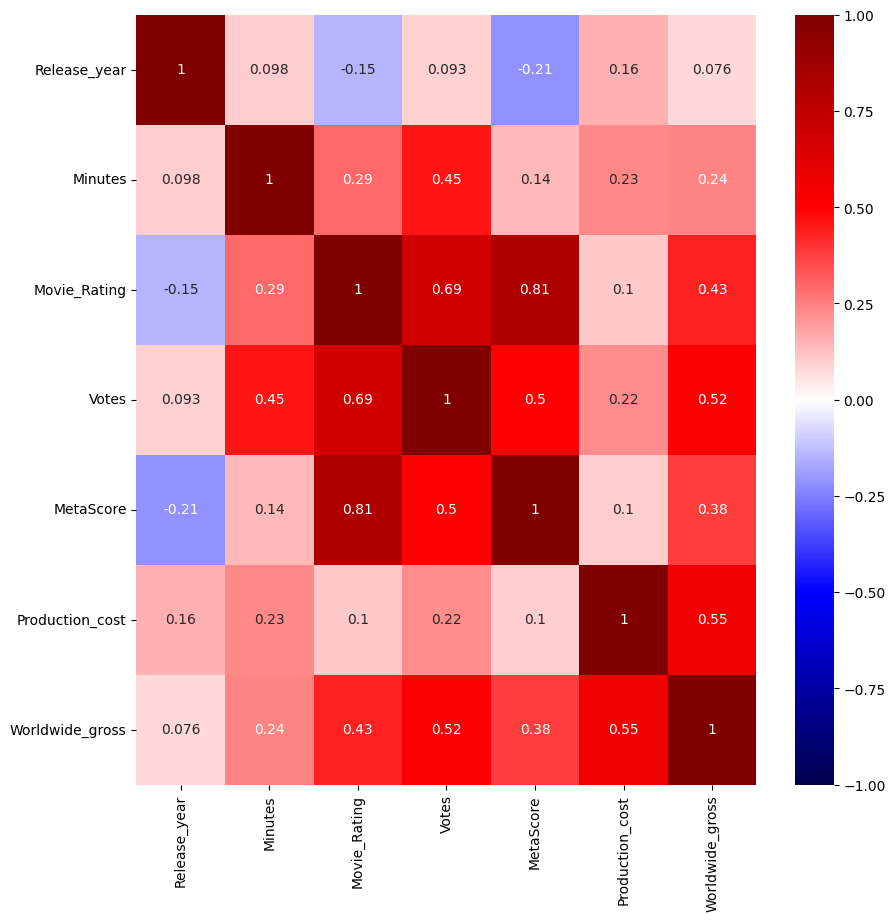

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)

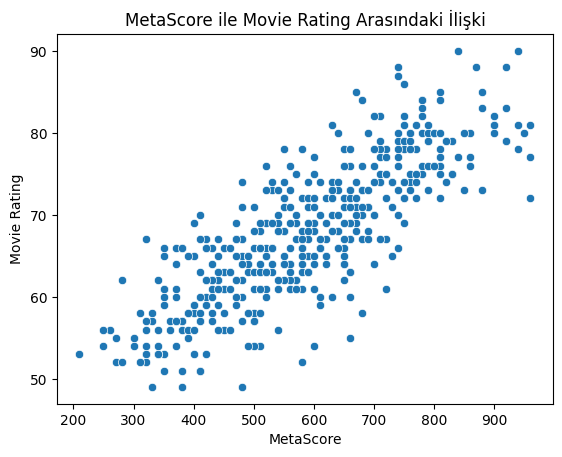

In [11]:
sns.scatterplot(data=df, x='MetaScore', y='Movie_Rating')
plt.title('MetaScore ile Movie Rating Arasındaki İlişki')
plt.xlabel('MetaScore')
plt.ylabel('Movie Rating')
plt.show()

In [12]:

correlation = df['MetaScore'].corr(df['Movie_Rating'])
print("Pearson Korelasyon Katsayısı:", correlation)


Pearson Korelasyon Katsayısı: 0.8143190620154742


In [13]:
X = df[['MetaScore']]
y = df['Movie_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(mse)
msa=mean_absolute_error(y_test, y_pred)
print(msa)
r2 = r2_score(y_test, y_pred)
print(r2)

22.361415452465554
3.788534654818989
0.7233791617064496


In [14]:
new_model = smf.ols('MetaScore ~ Movie_Rating' , data=df).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MetaScore   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     899.5
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          4.90e-110
Time:                        05:49:03   Log-Likelihood:                -2723.9
No. Observations:                 459   AIC:                             5452.
Df Residuals:                     457   BIC:                             5460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -440.2842     34.447    -12.781      0.000    -507.979    -372.590
Movie_Rating    15.1356      0.505     29.992      0.000      14.144      16.127
==============================================================================
Omnibus:                        1.986   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.815
Skew:                           0.149   Prob(JB):                        0.404
Kurtosis:                       3.079   Cond. No.                         550.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""